### **Using the Titanic Dataset**

### **Step 1 : Load the Data**

In [3]:
import pandas as pd

# load the dataset
train = pd.read_csv("C:\\Users\\Admin\\Downloads\\train.csv")
test = pd.read_csv("C:\\Users\\Admin\\Downloads\\test.csv")
gender_submission = pd.read_csv("C:\\Users\\Admin\\Downloads\\gender_submission.csv")

# Create a copy of original 'train' dataset
original_train = train.copy()

# Display the first few rows of train dataset to understand the structure
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **Step 2 : Explore the Data**

In [5]:
# Check the structure of the train dataset
train.info()

# Check for missing values
train.isnull().sum()

# Describe the dataset (summary statistics)
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### **Step 3 : Data Cleaning & Preprocessing**

#### **3.1 : Handle Missing values**

In [8]:
# Fill missing 'Age' with mean
train['Age'] = train['Age'].fillna(train['Age'].mean())

# Fill missing 'Embarked' with the most frequent value (mode)
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

# Drop 'Cabin' column due to too many missing values
train = train.drop(columns = ['Cabin'])

#### **3.2 : Convert Categorical columns**
##### **- We need to convert categorial variables like 'Sex' and 'Embarked' into numeric values.**
##### **- This can be done with encoding techniques like Label Encoding or One-hot encoding.**

In [10]:
# Convert 'Sex' into a numeric variable (1 for male, 0 for female)
train['Sex'] = train['Sex'].map({'male' : 1, 'female' : 0})

# One-hot encode 'Embarked' using pandas get_dummies
train = pd.get_dummies(train, columns = ['Embarked'], drop_first = True)

#### **3.3 : Feature Engineering**
##### **- Creating additional feature : Family Size : Combining 'SibSp' (siblings/spouses) and 'Parch' (parents/children) to create a FamilySize feature.**

In [12]:
# Create a new feature 'FamilySize' 
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1     # Adding 1 passenger for themselves

#### **3.4 : Drop irrelevant columns**

In [14]:
# Drop unnecessary columns
train = train.drop(columns = ['Name', 'PassengerId'])

### **Step 4 : Preparing features and target for modeling**
##### **- Preparing the data for machine learning by separating the features (X) and target variable (y)**

In [16]:
# Define the features (X) and target  (y)
X = train.drop(columns = ['Survived', 'Ticket'])
y = train['Survived']

### **Step 5 : Train-Test Split**
##### **- Split dataset into training and validation sets. This is crucial for evaluating the model performance.**

In [18]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

### **Step 6 : Model Training (Logistic Regression)**

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and Train Logistic regression model 
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_val)

# Evaluate the model's accuracy
print("Accuracy : ", accuracy_score(y_val, y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(y_val, y_pred))
print("\nClassification Report : \n", classification_report(y_val, y_pred))

Accuracy :  0.8100558659217877

Confusion Matrix : 
 [[90 15]
 [19 55]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



##### **- Model accuracy : 81 %, indicating good overall performance**
##### **- Higher precision and recall for class 0 (not survived) suggests the model predicts non-survivors better that suvivors**

### **Step 7 : Feature Importance (Coefficients)**
##### **- We can view these to understand which features are important for survival prediction.**

In [23]:
# Create a Dataframe to view feature names and their coefficients
feature_importance = pd.DataFrame({
    'Feature' : X_train.columns, 
    'Coefficient' : model.coef_[0]
})


# Sort by absolute coefficient value to see most impactful features
feature_importance['AbsCoefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by = 'AbsCoefficient', ascending = False)

# Drop the temporary column used for sorting
feature_importance = feature_importance.drop(columns = 'AbsCoefficient')

# Display the feature importance
print(feature_importance)

      Feature  Coefficient
1         Sex    -2.591647
0      Pclass    -0.940418
7  Embarked_S    -0.405492
3       SibSp    -0.160409
8  FamilySize    -0.137737
6  Embarked_Q    -0.092253
2         Age    -0.031372
4       Parch     0.024617
5        Fare     0.002565


#### **- Visual Representation**

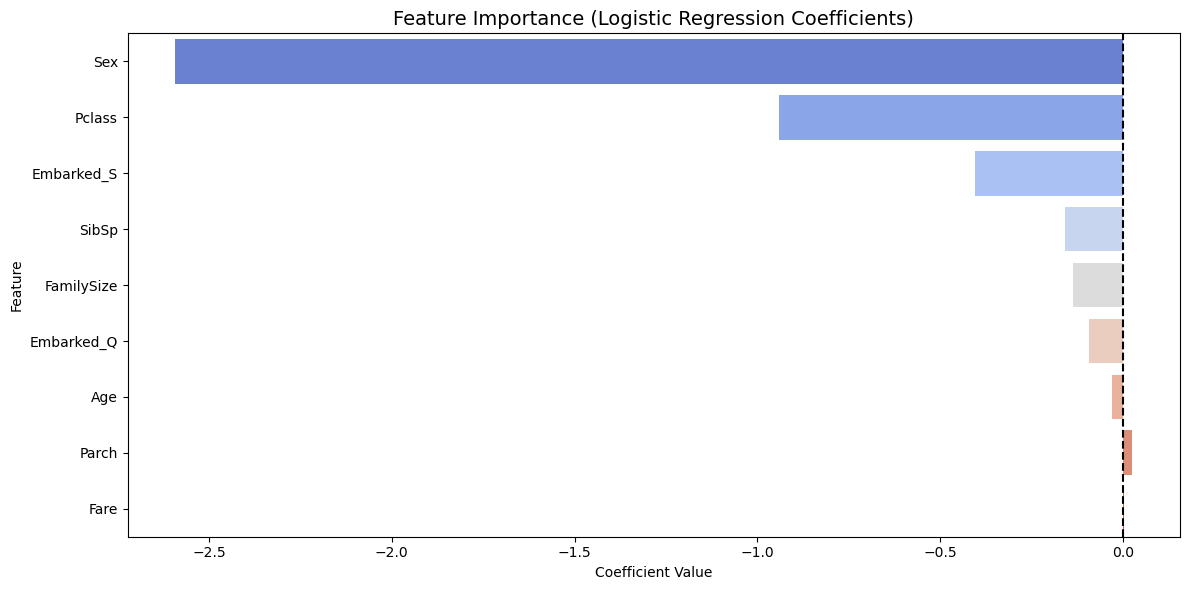

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns 

coeff_df = feature_importance.copy()
coeff_df = coeff_df.reindex(coeff_df.Coefficient.abs().sort_values(ascending = False).index)

# Plot
plt.figure(figsize = (12, 6))
sns.barplot(data = coeff_df, x = 'Coefficient', y = 'Feature',hue = 'Feature', dodge = False, palette = 'coolwarm', legend = False)
plt.title("Feature Importance (Logistic Regression Coefficients)", fontsize = 14)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.axvline(0, color = 'black', linestyle = '--')
plt.tight_layout()
plt.show()

##### **- Sex has the strongest negative coefficient, indicating that being male (coded as 1) significantly decreases the probability survival.**
##### **- Pclass and Embarked_S also negatively impact survival, suggesting passengers in lower classes and those who embarked from Southampton had lower chances of survival.**

### **Step 8 : Correlation Heatmap (Exploratory Visualization of Numeric Features)**
##### **- Analyze the linear relationships between numerical variables in the dataset using a correlation matrix and heatmap**

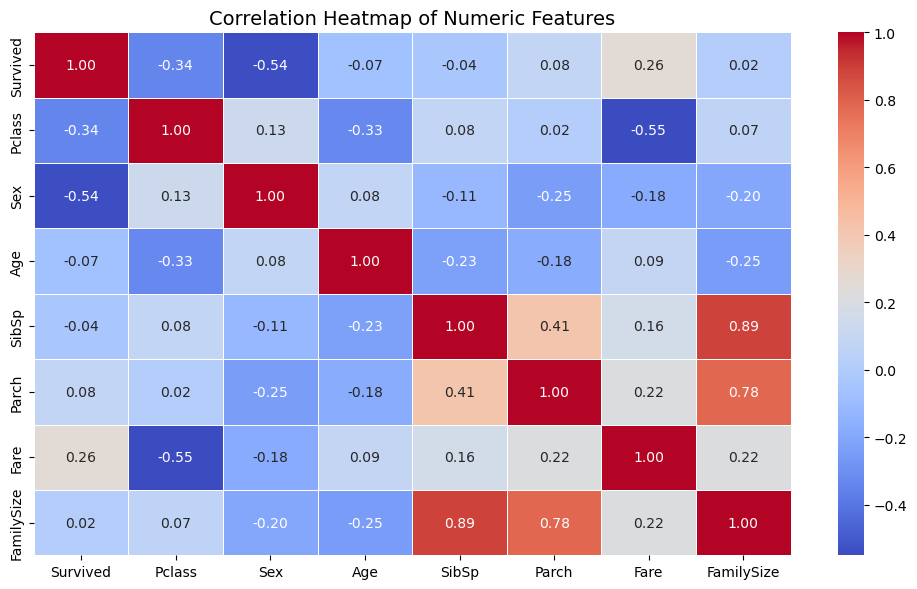

In [28]:
# Select only numerical columns for correlation
numeric_features = train.select_dtypes(include = ['int64', 'float64'])

# Compute correlation matrix 
corr_matrix = numeric_features.corr()

# Set plot size
plt.figure(figsize = (10, 6))

# Plot heatmap
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f", linewidths = 0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize = 14)
plt.tight_layout()
plt.show()

##### **- Sex is negatively correlated with survival -> Females had higher survival chances.**
##### **- Higher Fare slightly increases survival -> Wealthier passengers were more likely to survive.**

### **Step 9 : Final Mode Evaluation / Cross-Validation Score**
##### **- To ensure that the model is robust and generalizes well**

In [31]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv = 5, scoring = 'accuracy')

# Print results
print("Cross-Validation Accuracy Scores : ", cv_scores)
print("Average Cross-Validation Accuracy : ", cv_scores.mean()) 

Cross-Validation Accuracy Scores :  [0.78212291 0.78089888 0.78651685 0.76966292 0.8258427 ]
Average Cross-Validation Accuracy :  0.789008850668508


##### **- The model performs consistently across different folds, with accuracies ranging between ~77% to ~83%.**
##### **- The average accuracy of ~78.9% indicates that your logistic regression model is fairly reliable and generalizes well to unseen data.**

### **Step 10 : Predictions on the Test set**

In [34]:
# Using 'test' dataset

# Preprocessing steps for the test dataset (same as train data preprocessing)
test['Age'] = test['Age'].fillna(test['Age'].mean())
test['Fare'] = test['Fare'].fillna(test['Age'].mean())
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])

# Drop 'Cabin' as it's mostly missing
test = test.drop(columns = ['Cabin'])

# Convert 'Sex' into a numeric variable (1 for male, 0 for female)
test['Sex'] = test['Sex'].map({'male' : 1, 'female' : 0})

# One-hot encode 'Embarked' (same as train)
test = pd.get_dummies(test, columns = ['Embarked'], drop_first = True)

# Create 'FamilySize' feature (same as train)
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

# Ensure all expected columns are present (sometimes Embarked_Q or S might be missing)
for col in ['Embarked_Q', 'Embarked_S'] :
    if col not in test.columns :
        test[col] = 0

# Reorder columns to match X_train
X_test = test[X_train.columns]     # this ensures exact match of training features

# Make predictions using the trained model 
y_test_pred = model.predict(X_test)

# Save Predictions to a DataFrame and CSV
output = pd.DataFrame({'PassengerId' : test['PassengerId'], 'Survived' : y_test_pred})
output.to_csv('predictions.csv', index = False)

# View the first few rows of the predictions
print(output.head())

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1


##### **- The model predicts both survival and non-survival cases, indicating learned distinctions in the data.**
##### **- Among the first 5 passengers, 1 are predicted to survive, 4 not to survive.**